In [46]:
import cv2
import numpy as np
import os

In [47]:
pydir = "res_py/"
mydir = "res/"
scores = []
for d in os.listdir(mydir):
    sub = []
    for stack in os.listdir(mydir + d):
        for img in os.listdir(mydir + d + "/" + stack):
            img1 = cv2.imread(mydir + d + "/" + stack + "/" + img)
            img2 = cv2.imread(pydir + d + "/" + stack + "/" + img)
            img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
            img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
            img2 = img2.astype(np.float32) / 255.0
            img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
            
            print(len(np.where(img1 == img2)[0]) / (img1.shape[0] * img1.shape[1]))
            sub.append(len(np.where(img1 == img2)[0]) / (img1.shape[0] * img1.shape[1]))
    scores.append(sub)

0.96724375
0.9524875
0.955
0.955225
0.9534
0.95149375
0.95531875
0.95576875
0.95614375
0.9544875
0.9519875
0.94941875
0.9478625
0.94528125
0.94469375
0.943875
0.9443375
0.9402
0.93778125
0.93885625
0.9350125
0.92909375
0.9297125
0.925075
0.94149375
0.9423625
0.9285
0.9154
0.92115625
0.920525
0.9249625
0.91894375
0.9224875
0.9158625
0.91288125
0.91756875
0.92441875
0.9226375
0.915025
0.92063125
0.91869375
0.9209125
0.92734375
0.9279375
0.9329
0.9331
0.93754375
0.93176875
0.9360375
0.93488125
0.93511875
0.9367375
0.93696875
0.93680625
0.94641875
0.94739375
0.94828125
0.94574375
0.94525
0.94279375
0.94385625
0.94745625
0.9510875
0.95529375
0.9548125
0.95830625
0.960075
0.95876875
0.95760625
0.96020625
0.9418
0.91006875
0.9260375
0.926125
0.9189125
0.92415
0.9288875
0.92705
0.92995625
0.9302
0.9329375
0.9257125
0.91335
0.9116875
0.9134625
0.91313125
0.90395
0.908275
0.89613125
0.90479375
0.89495
0.88865625
0.897125
0.88235625
0.9002625
0.90736875
0.8971125
0.88369375
0.88108125
0.87791875


In [48]:
scores

[[0.96724375,
  0.9524875,
  0.955,
  0.955225,
  0.9534,
  0.95149375,
  0.95531875,
  0.95576875,
  0.95614375,
  0.9544875,
  0.9519875,
  0.94941875,
  0.9478625,
  0.94528125,
  0.94469375,
  0.943875,
  0.9443375,
  0.9402,
  0.93778125,
  0.93885625,
  0.9350125,
  0.92909375,
  0.9297125,
  0.925075,
  0.94149375,
  0.9423625,
  0.9285,
  0.9154,
  0.92115625,
  0.920525,
  0.9249625,
  0.91894375,
  0.9224875,
  0.9158625,
  0.91288125,
  0.91756875,
  0.92441875,
  0.9226375,
  0.915025,
  0.92063125,
  0.91869375,
  0.9209125,
  0.92734375,
  0.9279375,
  0.9329,
  0.9331,
  0.93754375,
  0.93176875,
  0.9360375,
  0.93488125,
  0.93511875,
  0.9367375,
  0.93696875,
  0.93680625,
  0.94641875,
  0.94739375,
  0.94828125,
  0.94574375,
  0.94525,
  0.94279375,
  0.94385625,
  0.94745625,
  0.9510875,
  0.95529375,
  0.9548125,
  0.95830625,
  0.960075,
  0.95876875,
  0.95760625,
  0.96020625,
  0.9418,
  0.91006875,
  0.9260375,
  0.926125,
  0.9189125,
  0.92415,
  0.92888

0.8846766732283464 0.6146875 1.0 0.0807631479663164


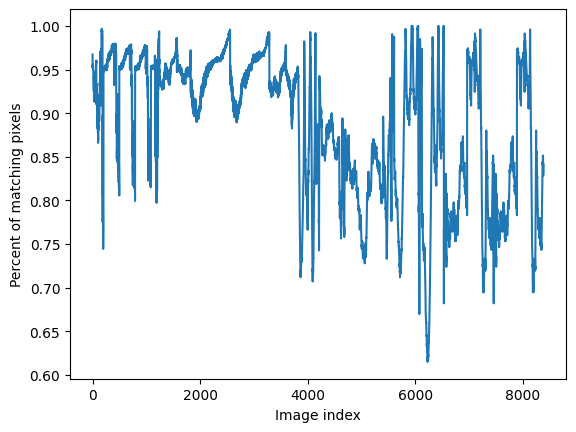

In [49]:
import matplotlib.pyplot as plt
sum_scores = sum(scores, [])
plt.plot(sum_scores)
plt.ylabel("Percent of matching pixels")
plt.xlabel("Image index")

print(np.mean(sum_scores), np.min(sum_scores), np.max(sum_scores), np.std(sum_scores))

0.927929332822086 0.86588125 0.97370625 0.025923119538293772
0.9394088667168675 0.74426875 0.99659375 0.04883650347851772
0.945194577074392 0.79708125 0.99583125 0.026443825742717676
0.941652225079114 0.882425 0.99265625 0.022046230775459957
0.8328243837514585 0.706925 0.9929875 0.05150361951084319
0.8785376445086704 0.7117875 1.0 0.0850253718056181
0.8215889968487395 0.6146875 1.0 0.1122993109090937
0.8327901390388768 0.6818875 0.99593125 0.08141054385279324
0.8327901390388768 0.6818875 0.99593125 0.08141054385279324


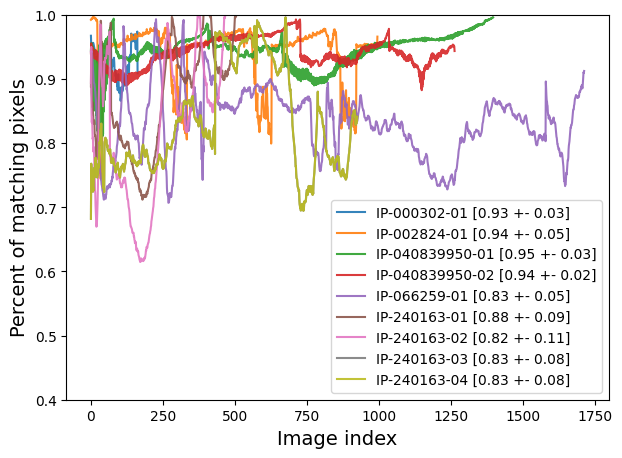

In [66]:
subs = os.listdir(mydir)
plt.figure(figsize=(7, 5))
for i in range(len(scores)):
    alpha = .9
    
    plt.plot(scores[i], label=f"{subs[i].replace('Images-Patient', 'IP')} [{np.mean(scores[i]):.2f} +- {np.std(scores[i]):.2f}]", alpha=alpha)
    plt.ylabel("Percent of matching pixels", fontsize=14)
    plt.xlabel("Image index", fontsize=14)
    plt.ylim(.4, 1)
    plt.legend()
    print(np.mean(scores[i]), np.min(scores[i]), np.max(scores[i]), np.std(scores[i]))